# 1. Понимание бизнеса

## 1.1 Цель
Токсичные комментарии

## 1.2 Описание
<Добавить описание работы и датасета>

# 2. Понимание данных

## 2.1 Импорт библиотек

In [26]:
# import json
from collections import Counter
# from string import punctuation
# import os

# import bz2
# import regex
import re
from tqdm import tqdm
# from scipy import sparse
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS
# from pymorphy2 import MorphAnalyzer
# import gensim
# from gensim import corpora

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
# import nltk
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 10)
tqdm.pandas()

## 2.2 Вспомогательные функции

## 2.3 Загрузка данных

In [2]:
comments = pd.read_csv('comments.csv')
comments.info()
comments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


## 2.4 Статистика и визуализации

In [3]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.update(STOPWORDS)
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 '

(-0.5, 399.5, 199.5, -0.5)

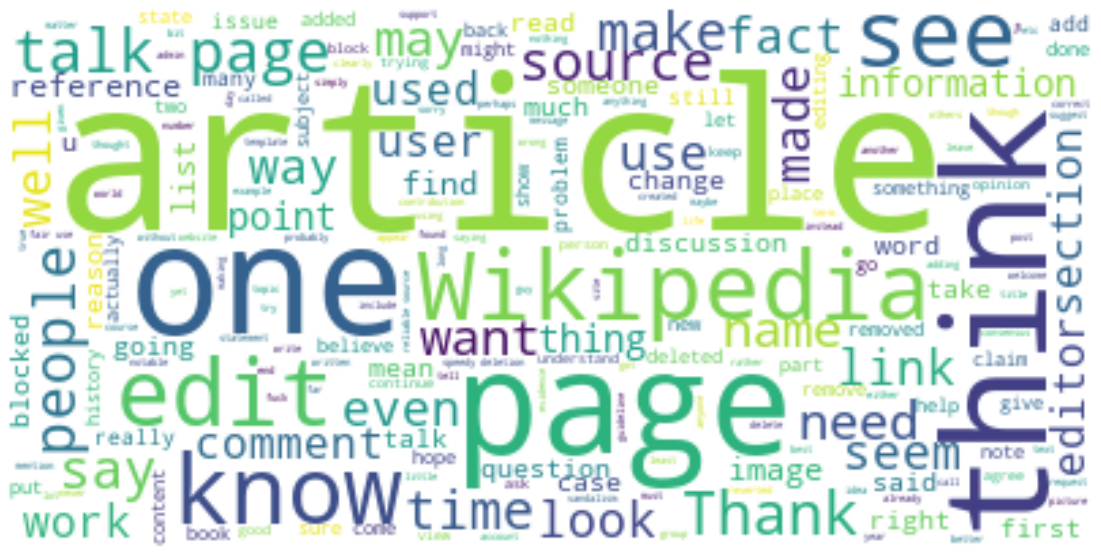

In [4]:
wordcloud = WordCloud(background_color="white", stopwords=stopwords_set).generate(' '.join(comments['text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

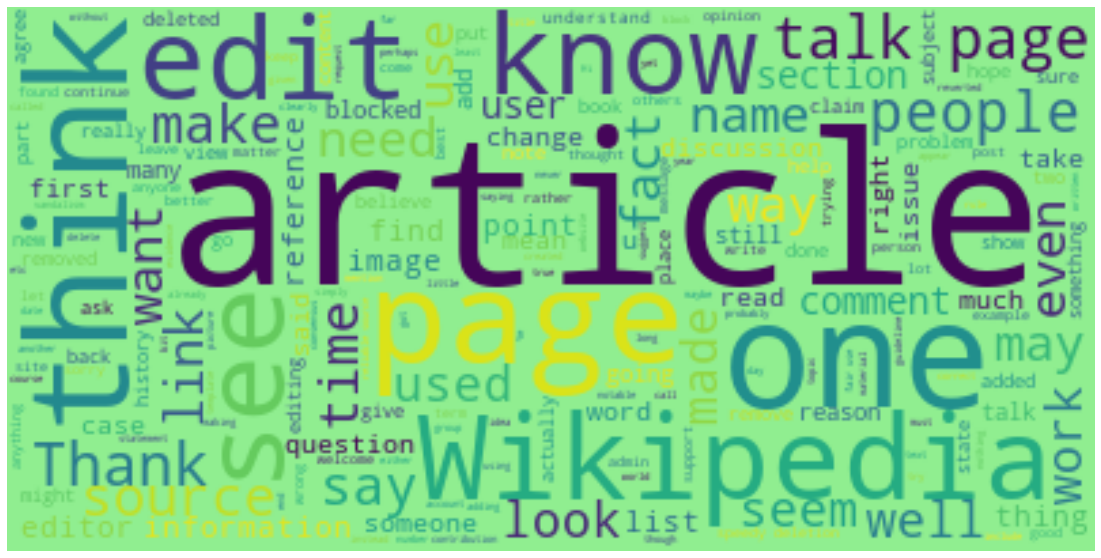

In [5]:
non_toxic_text = ' '.join(comments[comments['toxic'] == 0]['text'])

wordcloud = (
    WordCloud(background_color="lightgreen", stopwords=stopwords_set)
    .generate(non_toxic_text)
)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

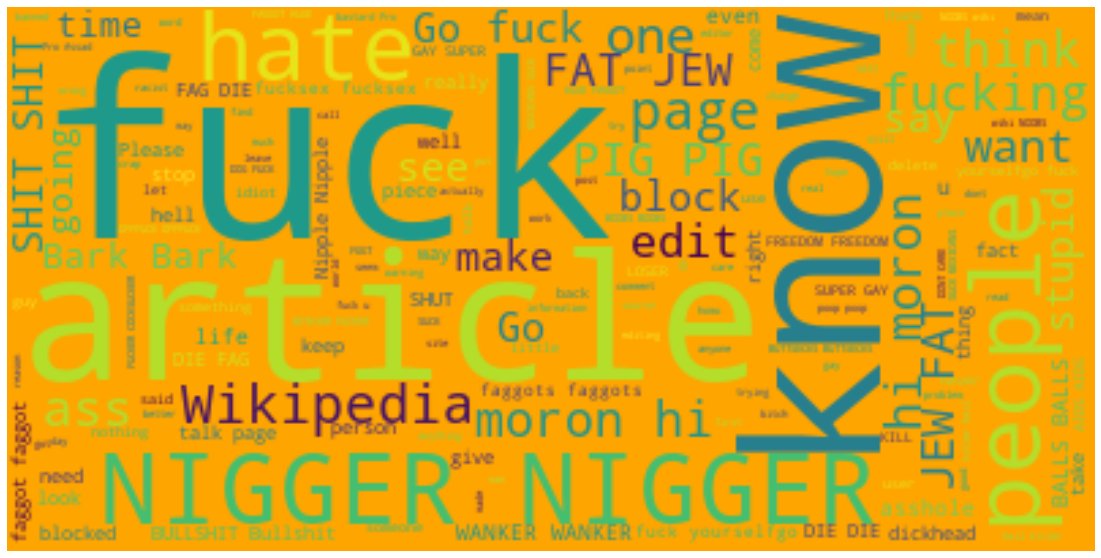

In [6]:
toxic_text = ' '.join(comments[comments['toxic'] == 1]['text'])

wordcloud = (
    WordCloud(background_color="orange", stopwords=stopwords_set)
    .generate(toxic_text)
)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# 3. Подготовка данных

In [7]:
# Добавляем столбцы с токенами
toketizer = TweetTokenizer()

def get_tokens(text):
    text = re.sub(r'\d+', ' ', text.lower())
    words = toketizer.tokenize(text)
    new_words = [word for word in words if word.isalnum() and word not in stopwords_set]
    return new_words

comments['tokens'] = comments['text'].progress_apply(get_tokens)
comments['tokens_count'] = comments['tokens'].str.len()
comments['char_count'] = comments['text'].str.len()
comments

100%|██████████| 159571/159571 [00:56<00:00, 2817.96it/s]


,text,toxic,tokens,tokens_count,char_count
0,Explanation\nWhy the edits made under my usern...,0,"[explanation, edits, made, username, hardcore,...",22,264
1,D'aww! He matches this background colour I'm s...,0,"[matches, background, colour, seemingly, stuck...",9,112
2,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, really, trying, edit, war, guy, con...",21,233
3,"""\nMore\nI can't make any real suggestions on ...",0,"[make, real, suggestions, improvement, wondere...",46,622
4,"You, sir, are my hero. Any chance you remember...",0,"[sir, hero, chance, remember, page]",5,67
...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,"[second, time, asking, view, completely, contr...",23,295
159567,You should be ashamed of yourself \n\nThat is ...,0,"[ashamed, horrible, thing, put, talk, page]",6,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,"[spitzer, umm, theres, actual, article, prosti...",9,81
159569,And it looks like it was actually you who put ...,0,"[looks, actually, put, speedy, first, version,...",8,116


In [8]:
non_toxic = comments[comments['toxic'] == 0]
non_toxic5_texts = non_toxic['text'].head(2).to_list()
print('\n\n'.join(non_toxic5_texts))

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


In [9]:
toxic = comments[comments['toxic'] == 1]
toxic5_texts = toxic['text'].head(2).to_list()
print('\n\n'.join(toxic5_texts))

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK

Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


In [10]:
toxic_tokens_cnt = Counter()  # счетчик длин твитов по словам (ключ: длина твита, значение: кол-во твитов такой длины)
toxic_tokens_cnt.update(toxic['tokens_count'])
toxic_char_cnt = Counter()  # счетчик длин твитов по символам (ключ: длина твита, значение: кол-во твитов такой длины)
toxic_char_cnt.update(toxic['char_count'])

In [11]:
toxic_tokens_cnt.most_common(5)

[(4, 1090), (5, 1058), (3, 1019), (6, 949), (7, 810)]

In [12]:
toxic_char_cnt.most_common(5)

[(23, 123), (34, 123), (31, 115), (27, 113), (32, 112)]

In [13]:
non_toxic_tokens_cnt = Counter()  # счетчик длин твитов по словам (ключ: длина твита, значение: кол-во твитов такой длины)
non_toxic_tokens_cnt.update(non_toxic['tokens_count'])
non_toxic_char_cnt = Counter()  # счетчик длин твитов по символам (ключ: длина твита, значение: кол-во твитов такой длины)
non_toxic_char_cnt.update(non_toxic['char_count'])

In [14]:
non_toxic_tokens_cnt.most_common(5)

[(5, 5692), (4, 5492), (6, 5486), (3, 5114), (8, 4992)]

In [15]:
non_toxic_char_cnt.most_common(5)

[(41, 521), (24, 519), (35, 512), (32, 505), (33, 504)]

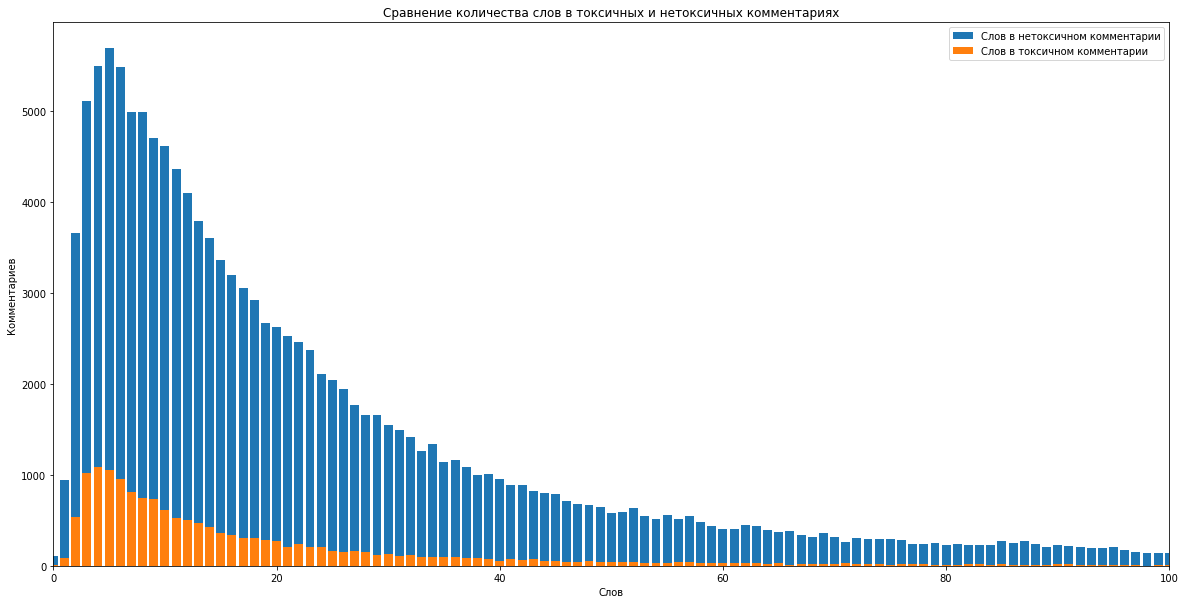

In [43]:
# line 1 points
x1 = non_toxic_tokens_cnt.keys()
y1 = non_toxic_tokens_cnt.values()
# plotting the line 1 points 
plt.bar(x1, y1, label = "Слов в нетоксичном комментарии")
# line 2 points
x2 = toxic_tokens_cnt.keys()
y2 = toxic_tokens_cnt.values()
# plotting the line 2 points 
plt.bar(x2, y2, label = "Слов в токсичном комментарии")
plt.xlabel('Слова')
# Set the y axis label of the current axis.
plt.ylabel('Комментарии')
# Set a title of the current axes.
plt.title('Сравнение количества слов в токсичных и нетоксичных комментариях')
# show a legend on the plot
plt.legend()
plt.xlim((0, 100))
# Display a figure.
plt.show()

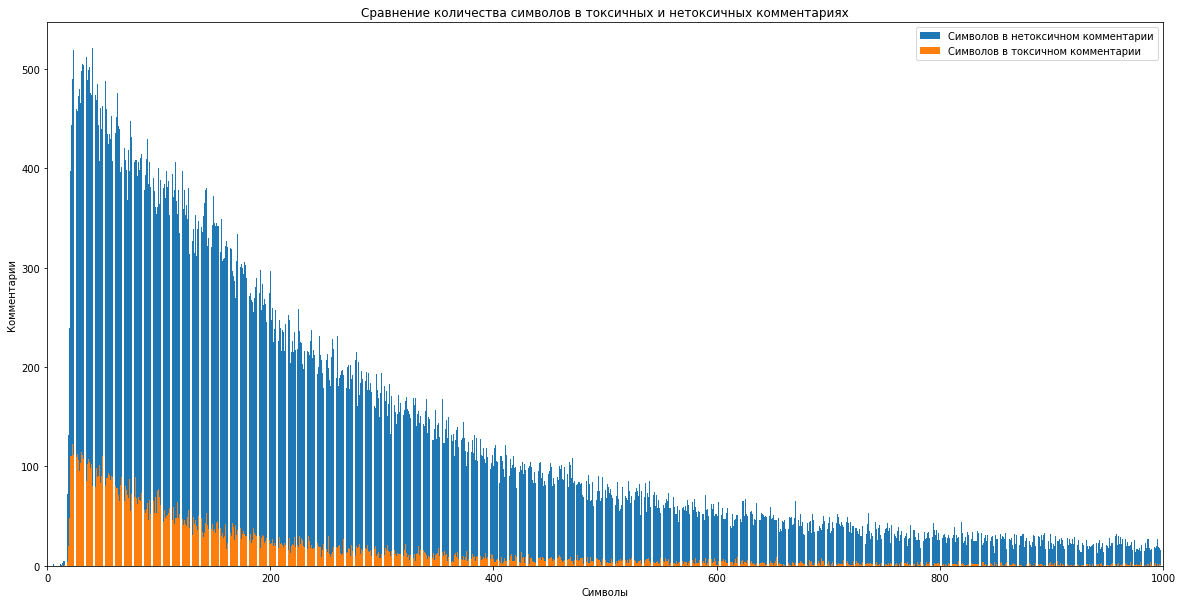

In [45]:
# line 1 points
x1 = non_toxic_char_cnt.keys()
y1 = non_toxic_char_cnt.values()
# plotting the line 1 points 
plt.bar(x1, y1, label = "Символов в нетоксичном комментарии")
# line 2 points
x2 = toxic_char_cnt.keys()
y2 = toxic_char_cnt.values()
# plotting the line 2 points 
plt.bar(x2, y2, label = "Символов в токсичном комментарии")
plt.xlabel('Символы')
# Set the y axis label of the current axis.
plt.ylabel('Комментарии')
# Set a title of the current axes.
plt.title('Сравнение количества символов в токсичных и нетоксичных комментариях')
# show a legend on the plot
plt.legend()
plt.xlim((0, 1000))
# Display a figure.
plt.show()

In [51]:
non_toxic_freqs[:10]

[5692, 5492, 5486, 5114, 4992, 4986, 4707, 4612, 4358, 4101]

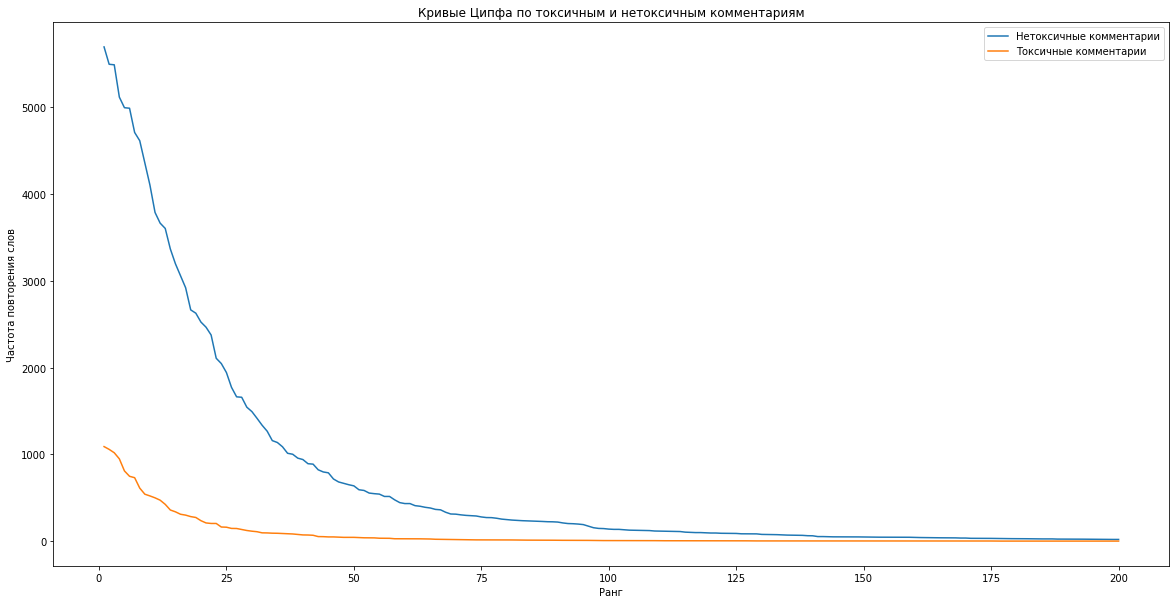

In [67]:
size = 200
x = range(1, size + 1)

non_toxic_freqs = sorted(non_toxic_tokens_cnt.values(), reverse = True)
plt.plot(x, non_toxic_freqs[:size], label = "Нетоксичные комментарии")

toxic_freqs = sorted(toxic_tokens_cnt.values(), reverse = True)
plt.plot(x, toxic_freqs[:size], label = "Токсичные комментарии")

plt.title('Кривые Ципфа по токсичным и нетоксичным комментариям')
plt.xlabel('Ранг')
plt.ylabel('Частота повторения слов')
plt.legend()
plt.show()

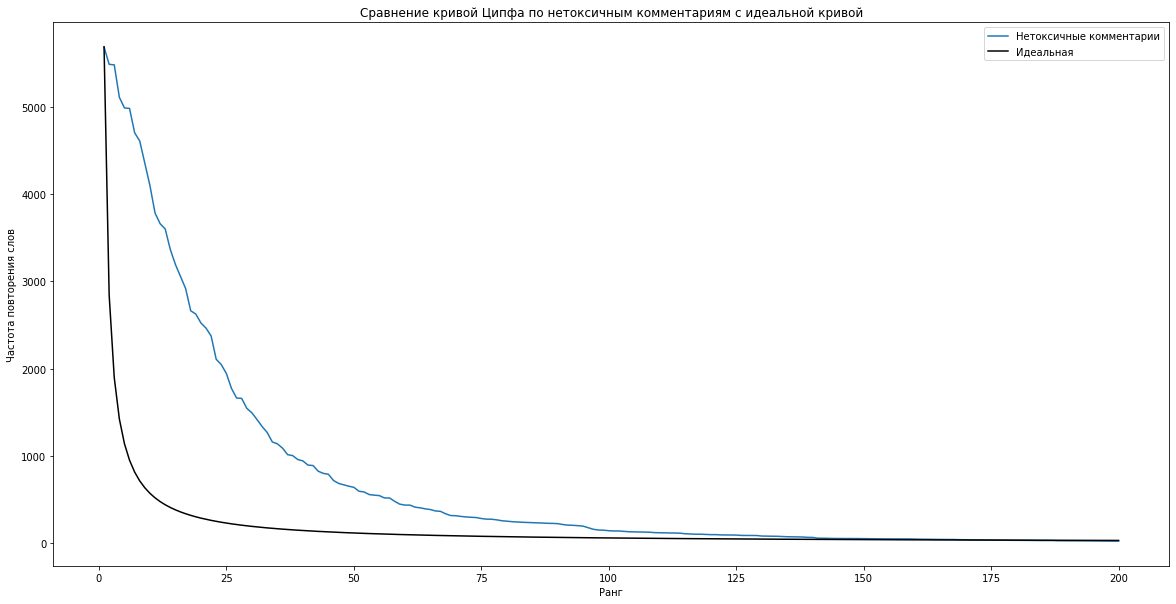

In [68]:
plt.plot(x, non_toxic_freqs[:size], label = "Нетоксичные комментарии")
non_toxic_ideal = [non_toxic_freqs[0] / i for i in x]
plt.plot(x, non_toxic_ideal, color='black', label='Идеальная')

plt.title('Сравнение кривой Ципфа по нетоксичным комментариям с идеальной кривой')
plt.xlabel('Ранг')
plt.ylabel('Частота повторения слов')
plt.legend()
plt.show()

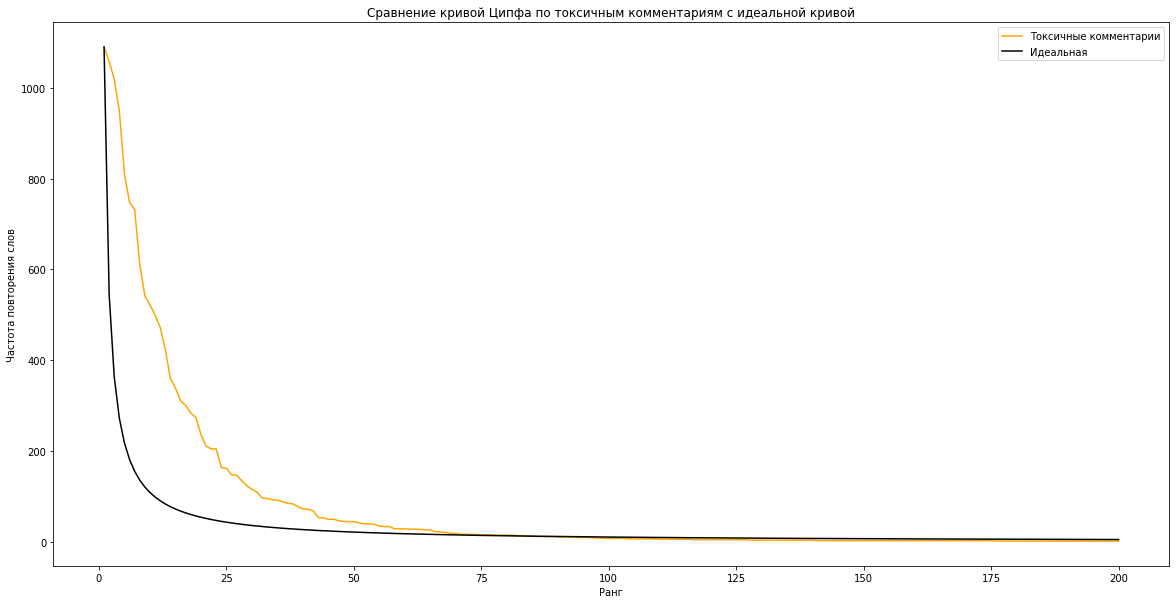

In [70]:
plt.plot(x, toxic_freqs[:size], label = "Токсичные комментарии", color='orange')
toxic_ideal = [toxic_freqs[0] / i for i in x]
plt.plot(x, toxic_ideal, color='black', label='Идеальная')

plt.title('Сравнение кривой Ципфа по токсичным комментариям с идеальной кривой')
plt.xlabel('Ранг')
plt.ylabel('Частота повторения слов')
plt.legend()
plt.show()

In [77]:
def get_heaps_values(df):
    cnt = Counter()
    n_words = []
    n_tokens = []
    tokens = []
    sum_tokens = 0
    for _, row in tqdm(df.iterrows(), total=len(df)):
        cnt.update(row['tokens'])
        n_words.append(len(cnt))  # записываем накопленное кол-во уникальных слов для текущего твита
        sum_tokens += row['tokens_count']
        n_tokens.append(sum_tokens)  # записываем накопленное кол-во токенов ВСЕГО (включая повторения)
    return n_tokens, n_words, cnt

x_non_toxic, y_non_toxic, non_toxic_cnt = get_heaps_values(non_toxic)
x_toxic, y_toxic, toxic_cnt = get_heaps_values(toxic)

100%|██████████| 16225/16225 [00:01<00:00, 9960.97it/s] 


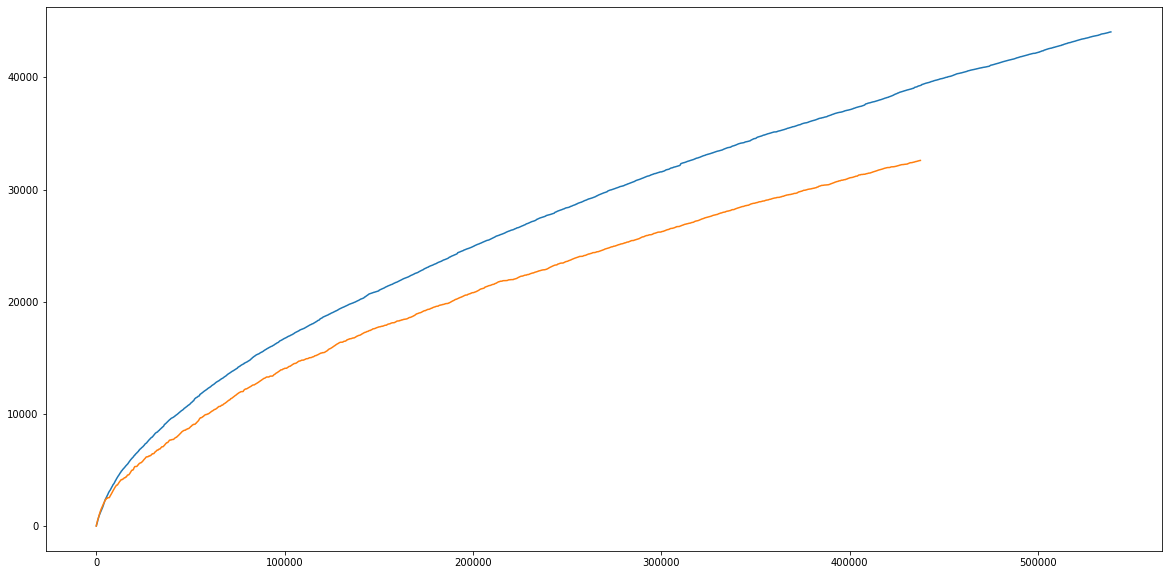

In [75]:
size = min(len(non_toxic), len(toxic))

plt.plot(x_non_toxic[:size], y_non_toxic[:size])
plt.plot(x_toxic[:size], y_toxic[:size])
plt.show()

In [79]:
toxic_cnt.most_common(10)

[('fuck', 9623),
 ('shit', 3660),
 ('wikipedia', 3554),
 ('nigger', 3294),
 ('suck', 3245),
 ('fucking', 3238),
 ('go', 2964),
 ('ass', 2955),
 ('u', 2909),
 ('hate', 2637)]

In [80]:
non_toxic_cnt.most_common(10)

[('article', 54165),
 ('page', 43512),
 ('wikipedia', 39515),
 ('talk', 35232),
 ('please', 28657),
 ('one', 26518),
 ('see', 20527),
 ('think', 18670),
 ('edit', 16729),
 ('know', 16688)]

In [84]:
toxic_set = set(toxic_cnt.keys())
non_toxic_set = set(non_toxic_cnt.keys())

len(toxic_set), len(non_toxic_set)

(32594, 154086)

In [88]:
# Слова, которые есть только в нетоксичных комментариях
non_toxic_only_set = non_toxic_set - toxic_set
non_toxic_only_set

{'detrick',
 'trialware',
 'csf',
 'ukrai',
 'pby',
 'rem',
 'miked',
 'ontop',
 'lombock',
 'phj',
 'recourses',
 'laughingly',
 'visayan',
 'drivesfastturnsleftandright',
 'hateyouevenmore',
 'injunction',
 'freeskiing',
 'karman',
 'caboolture',
 'reclaim',
 'disertation',
 'arbitated',
 'boll',
 'tailgaters',
 'shtetlinks',
 'flaimers',
 'sunup',
 'vennakapu',
 'baised',
 'predictive',
 'listadmins',
 'giantpanda',
 'ddn',
 'pistachios',
 'manuals',
 'ickl',
 'jouranistic',
 'batak',
 'pietru',
 'saltsjöbadsavtalet',
 'transforming',
 'idiocratic',
 'amharic',
 'magement',
 'mishandling',
 'ionosphere',
 'phuket',
 'papus',
 'alooone',
 'bernacchi',
 'workstations',
 'wpc',
 'britisher',
 'killedcalifornia',
 'findarticles',
 'influxes',
 'blondevikingprincess',
 'solacium',
 'wildthing',
 'fkc',
 'smatprt',
 'esten',
 'decryption',
 'teti',
 'floquenbeam',
 'artifacts',
 'draja',
 'laudable',
 'deatbeat',
 'amraam',
 'ungainly',
 'snifle',
 'plebian',
 'rachunek',
 'topal',
 'dehy

In [89]:
# Слова, которые есть только в токсичных комментариях
toxic_only_set = toxic_set - non_toxic_set
toxic_only_set

{'chace',
 'shitt',
 'bouthim',
 'hrrassing',
 'coomie',
 'pursons',
 'angrybirdlover',
 'caca',
 'taintopenlygay',
 'ridicoulous',
 'chứ',
 'quiickly',
 'shread',
 'slimebag',
 'dunked',
 'krasnodar',
 'cumfart',
 'alsdfsml',
 'heliotropic',
 'unclarified',
 'nawliwiki',
 'sasayama',
 'fagots',
 'buuuuuuuuuuurn',
 'nught',
 'unnameable',
 'glockers',
 'suckipedia',
 'asimilated',
 'faeggot',
 'poccadishonest',
 'sarbonne',
 'fuckwits',
 'worshiper',
 'sinofdreams',
 'icecoldbeer',
 'jasenm',
 'bbsrock',
 'adminstirators',
 'appaled',
 'sensical',
 'fuckiest',
 'tocuh',
 'greenc',
 'feloneous',
 'montego',
 'thermophilus',
 'probbly',
 'idenfinitley',
 'maen',
 'illnes',
 'beem',
 'mutherfuckng',
 'bints',
 'lovesssss',
 'acedemics',
 'anythingtalk',
 'serna',
 'nethlands',
 'psudeo',
 'oten',
 'lookie',
 'ngày',
 'gayz',
 'raha',
 'wikiepdians',
 'pleads',
 'bigest',
 'rhetorts',
 'schoolim',
 'hypens',
 'monky',
 'edputa',
 'warnning',
 'persone',
 'weeed',
 'recognzied',
 'uhbsirtub

In [18]:
toxic

,text,toxic,tokens,tokens_count,char_count
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,"[cocksucker, piss, around, work]",4,44
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,"[hey, talk, exclusive, group, wp, talibans, go...",25,319
16,"Bye! \n\nDon't look, come or think of comming ...",1,"[bye, look, come, think, comming, back, tosser]",7,57
42,You are gay or antisemmitian? \n\nArchangel WH...,1,"[gay, antisemmitian, archangel, white, tiger, ...",58,648
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,"[fuck, filthy, mother, ass, dry]",5,40
...,...,...,...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",1,"[previous, conversation, fucking, shit, eating...",157,1677
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,"[mischievious, pubic, hair]",3,33
159541,Your absurd edits \n\nYour absurd edits on gre...,1,"[absurd, edits, absurd, edits, great, white, s...",28,346
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1,"[hey, listen, delete, edits, annoyed, wwe, ros...",39,534


Можно сделать построение графиков длин слов, сравнить токсичные тексты с нетоксичными

Найдем 10 самых частых:
- слов без стоп-слов
- лемм
- существительных

## 3.2 Заполнить пропущенные значения в переменных

## 3.3 Feature Engineering - добавляем новые признаки

## 3.4 Сборка финальных датасетов для моделирования

# 4. Моделирование

# 5. Оценка

## 5.1 Модель